Capstone Project: Build a live camera app
=============


5. Create new test set
------------


Start by reimporting all required modules.

In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import random

import os
import sys
import tarfile

from IPython.display import display, Image
from scipy import ndimage
from scipy.misc import imresize

from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

Load the images into a dataset, printing them full size as they load. Resize to 64 x 64 and normalise.

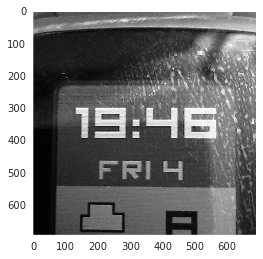

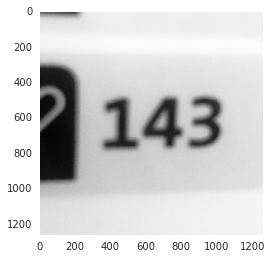

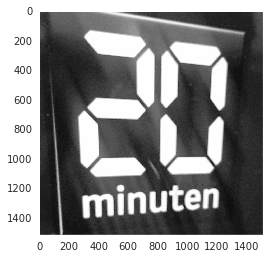

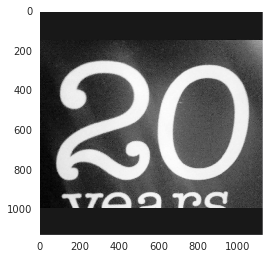

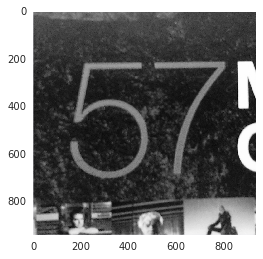

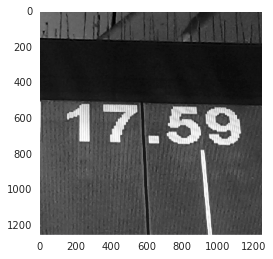

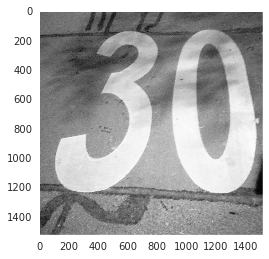

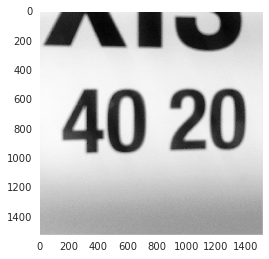

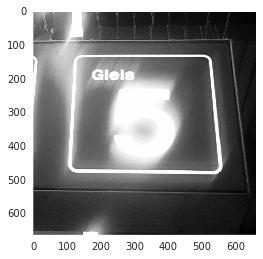

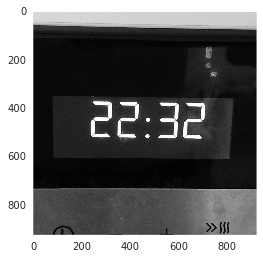

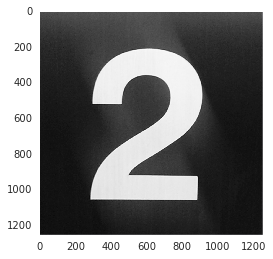

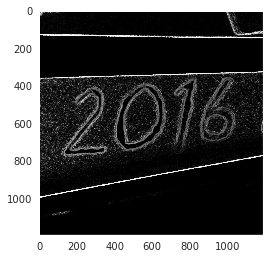

Number:  12
Mean:    0.0 
Std dev: 1.0


In [2]:
def show_image(image):
  fig,ax = plt.subplots(1)
  ax.imshow(image, interpolation='none')
  ax.grid(False)
  plt.show()

def load_test_photos(folder, image_size):
  file_list = os.listdir(folder)
  dataset = np.zeros((len(file_list), image_size, image_size), dtype='float32')
  for i, filename in enumerate(file_list):
    image_file = os.path.join(folder,filename)
    image = 255 - ndimage.imread(image_file, mode='F').astype(float)
    show_image(image)
    image = imresize(image, (image_size, image_size), interp='cubic')
    dataset[i,:,:] = image
  return dataset

def normalise(dataset):
  mean = np.mean(dataset)
  std = np.std(dataset)
  normalised_dataset = (dataset - mean) / std
  print('Number:  {}\nMean:    {} \nStd dev: {}'.format(len(normalised_dataset),
                                                       np.mean(normalised_dataset), np.std(normalised_dataset)))
  return normalised_dataset

test_photo_dataset = normalise(load_test_photos('photos', 64))




Print the grid of photos to check they're still good.

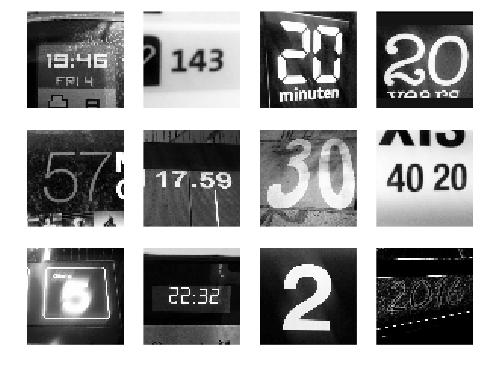

In [3]:
def show_grid_of_numbers(data, nrows=3, ncols=4):
  fig, ax_list = plt.subplots(nrows=nrows, ncols=ncols,figsize=(2*ncols,2*nrows))
  for i, ax in enumerate(ax_list.flat):
    ax.imshow(data[i,:,:], interpolation='none')
    ax.grid(False)
    ax.axis('off')
  plt.show()

show_grid_of_numbers(test_photo_dataset)

And finally, save to disk.

In [13]:
def maybe_pickle(data, pickle_file, force=False):
  if os.path.exists(pickle_file) and not force:
    print('%s already present - Skipping pickling.' % pickle_file)
  else:
    print('Pickling %s.' % pickle_file)
    try:
      with open(pickle_file, 'wb') as f:  # wb means write and binary mode. returns an object of type file. 
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
      print('Unable to save data to', pickle_file, ':', e)

maybe_pickle(test_photo_dataset, 'test_photos.pickle', True)

Pickling test_photos.pickle.
